In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:/MaunaLoaDailyTemps.csv", index_col='DATE', parse_dates=['DATE'])
df = df.dropna()
df.head()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


In [3]:
df.dtypes

MinTemp    float64
MaxTemp    float64
AvgTemp    float64
Sunrise      int64
Sunset       int64
dtype: object

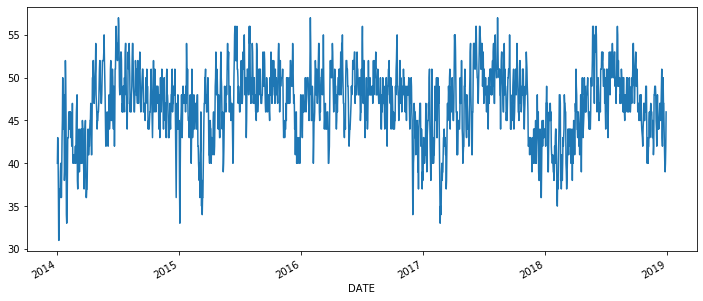

In [4]:
df['AvgTemp'].plot(figsize=(12, 5))
plt.show()

In [5]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(df['AvgTemp'])

print('ADF : ', adf[0])
print('P-value : ', adf[1])

for key, value in adf[4].items():
    print(f'{key} : {value}')

ADF :  -6.554680125068782
P-value :  8.675937480199415e-09
1% : -3.433972018026501
5% : -2.8631399192826676
10% : -2.5676217442756872


In [6]:
from pmdarima import auto_arima

stepwise_fit = auto_arima(df['AvgTemp'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.280, Time=2.63 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.23 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=2.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=2.88 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.303, Time=2.96 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8317.879, Time=3.05 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.192, Time=2.91 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8312.350, Time=3.52 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.258, Time=3.69 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.571, Time=4.19 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8305.931, Time=3.58 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.258
Date:                Fri, 07 May 2021   AIC                           8294.516
Time:                        14:49:57   BIC                           8338.573
Sample:                             0   HQIC                          8310.770
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.1876      0.358      3.321      0.001       0.487       1.889
ar.L1          0.9745      0.008    126.587      0.000       0.959       0.990
ma.L1         -0.1244      0.024     -5.285      0.000      -0.170      -0.078
ma.L2         -0.2213      0.024     -9.247      0.000      -0.268      -0.174
ma.L3         -0.2026      0.024     -8.531      0.000      -0.249      -0.156
ma.L4         -0.1380      0.023     -6.095      0.000      -0.182      -0.094
ma.L5         -0.0526      0.024     -2.168      0.030      -0.100      -0.005
sigma2         5.4705      0.170     32.109      0.000       5.137       5.804
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                20.26
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
size = int(len(df) * 0.7)
x_train, x_test = df[0:size], df[size:len(df)]
x_train.shape, x_test.shape

((1274, 5), (547, 5))

In [22]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df['AvgTemp'], order=(1, 0, 5))
fit_model = model.fit()
fit_model.summary()

C:\Users\ANUJ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1821
Model:                     ARMA(1, 5)   Log Likelihood               -4138.130
Method:                       css-mle   S.D. of innovations              2.347
Date:                Fri, 07 May 2021   AIC                           8292.261
Time:                        14:53:13   BIC                           8336.318
Sample:                             0   HQIC                          8308.514
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            46.5294      0.787     59.148      0.000      44.988      48.071
ar.L1.AvgTemp     0.9860      0.006    155.004      0.000       0.974       0.998
ma.L1.AvgTemp    -0.1403      0.024     -5.754      0.000      -0.188      -0.092
ma.L2.AvgTemp    -0.2328      0.024     -9.641      0.000      -0.280      -0.185
ma.L3.AvgTemp    -0.2163      0.025     -8.502      0.000      -0.266      -0.166
ma.L4.AvgTemp    -0.1478      0.023     -6.352      0.000      -0.193      -0.102
ma.L5.AvgTemp    -0.0587      0.024     -2.413      0.016      -0.106      -0.011
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0142           +0.0000j            1.0142            0.0000
MA.1            1.0867           -0.0000j            1.0867           -0.0000
MA.2            0.0537           -1.8503j            1.8511           -0.2454
MA.3            0.0537           +1.8503j            1.8511            0.2454
MA.4           -1.8566           -1.0630j            2.1394           -0.4172
MA.5           -1.8566           +1.0630j            2.1394            0.4172
-----------------------------------------------------------------------------
"""

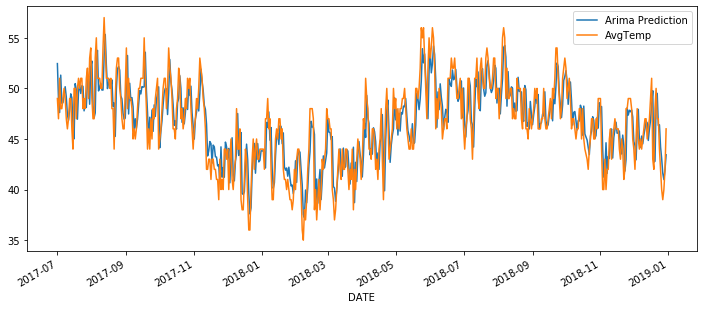

In [23]:
starts = len(x_train)
ends = len(x_train) + len(x_test)-1

pred = fit_model.predict(start=starts, end=ends, ).rename('Arima Prediction')
pred.index = df.index[starts : ends+1]

plt.figure(figsize=(12, 5))
pred.plot(legend=True) 
x_test['AvgTemp'].plot(legend=True)
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(x_test['AvgTemp'], pred))
error , x_test['AvgTemp'].mean()

(2.2077068846665777, 46.608775137111515)

In [17]:
df.tail()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753
2018-12-29,36.0,47.0,42.0,655,1753
2018-12-30,39.0,52.0,46.0,656,1754


In [28]:
future_prediction = fit_model.predict(start=len(df), end=len(df)+180).rename('Forecast')
future_prediction[:5]

C:\Users\ANUJ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


1821    46.418064
1822    46.113783
1823    45.617773
1824    45.249556
1825    45.116985
Name: Forecast, dtype: float64

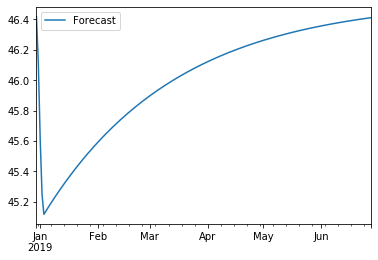

In [31]:
future_prediction.plot(legend=True)
plt.show()

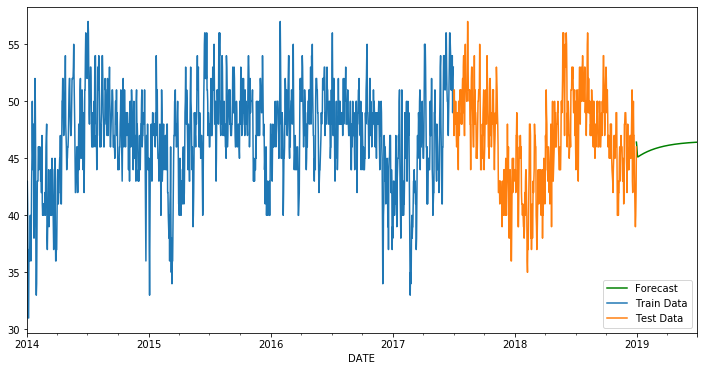

In [33]:
future_prediction_index = pd.date_range(start = '2018-12-30', end = '2019-06-28')
future_prediction.index = future_prediction_index

plt.figure(figsize=(12, 6))
future_prediction.plot(legend=True, color='g')
x_train['AvgTemp'].plot(label='Train Data', legend=True)
x_test['AvgTemp'].plot(label='Test Data', legend=True)
plt.show()